In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [58]:
def slice_image(path ,save_folder, crop_shape ,gap,extension  ,np_save_flag=True , pic_save_flag=True ):

    """
    arg1 : image 
    arg2 : crop_shape (row , col)
    crop할 사진의 이미지가 맞지 않으면 reshape을 진행합니다.
    gap : Image을 crop하고 얼만큼 
    """
    row = crop_shape[0]
    col = crop_shape[1]
    try:
        np_img=np.load(path)
    except IOError as ioe:
        break_flag=True
        print str(ioe)
        img=Image.open(path)
        np_img=np.asarray(img)
    
    if 2==len(np.shape(np_img)): ##이미지가 흑백일때 처리합니다 
        img_row , img_col = np.shape(np_img)
    #print img_row
    elif 3==len(np.shape(np_img)):##이미지가 컬러 일때 처리 합니다.
        img_row , img_col ,img_ch = np.shape(np_img)
    
    remainder_row=(img_row - row)%gap; 
    remainder_col=(img_col - col)%gap;

    row_crop_iter = (img_row - row)/gap
    col_crop_iter = (img_col - col)/gap
    #print remainder_row
    #print row_crop_iter

    
    count=0
    for r in xrange(row_crop_iter):                        
        for c in xrange(col_crop_iter):
            start_row=r*gap
            end_row=start_row + row
            start_col = c*gap
            end_col=start_col+col
            res_np=np_img[start_row:end_row, start_col : end_col]
            if pic_save_flag == True:
                res_img=plt.imshow(res_np)
                plt.savefig(save_folder+str(count)+'.'+extension)
                plt.close()
            if np_save_flag==True:
                np.save(save_folder+str(count) ,res_np)
                count+=1
            count+=1

###### 함수 설명: numpy_flag을 키면 numpy을 로드하고 numpy을 잘라서  svae_folder에저장합니다.
        잘라진 영상들은 1,2,3....이러게 기록됩니다 
        
    

In [59]:
def make_folder(path):
    print os.path.isdir(path)
    if os.path.isdir(path) == False:
        os.mkdir(path)

In [60]:
def crawl_folder(folder_path): #search_str 찾고자 하는 string 
    search_path_list=[]
    fileList = os.walk(folder_path).next()[2]
    subFolder_list = os.walk(folder_path).next()[1]
    if(len(fileList)!=0):
        for j in range(len(fileList)):
            search_path_list.append(folder_path+'/'+fileList[j])
    if len(subFolder_list)==0:
        return search_path_list
    else: 
        for i in range(len(subFolder_list)):
            search_path_list.extend(crawl_folder(folder_path+'/'+subFolder_list[i] ))
        return search_path_list


# Normal1

In [61]:
folder_path ='../Normal_no_edge/1/'
normal_path=crawl_folder(folder_path)
new_normal_path = []
for i , path in enumerate(normal_path):
    if '.npy' in path:
        new_normal_path.append(path)
normal_path=new_normal_path

../Normal_no_edge/1//normal_4653.npy
normal_4653
True
../Normal_no_edge/1//normal_3529.npy
normal_3529
False
../Normal_no_edge/1//normal_392.npy
normal_392
False
../Normal_no_edge/1//normal_3515.npy
normal_3515
False
../Normal_no_edge/1//normal_4687.npy
normal_4687
False
../Normal_no_edge/1//normal_4658.npy
normal_4658
False
../Normal_no_edge/1//normal_3535.npy
normal_3535
False
../Normal_no_edge/1//normal_402.npy
normal_402
False


KeyboardInterrupt: 

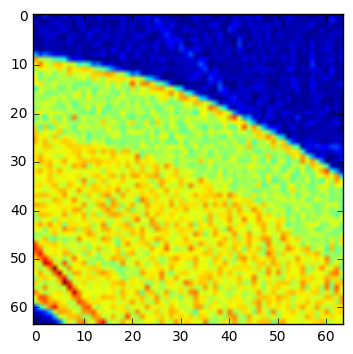

In [62]:
save_folder='/home/user01/hdd1/slice_normal/1/'
for ele in normal_path:
    print ele
    name = ele.split('/')[-1].split('.')[0]
    print name
    print os.path.isdir(save_folder+name+'/') 
    if os.path.isdir(save_folder+name+'/') == False:
        os.mkdir(save_folder+name)
    save_folder_ = save_folder+name+'/'
    slice_image( ele , save_folder_ ,(64,64),25 , 'jpeg' , np_save_flag=True , pic_save_flag=True )  
    #name 을 폴더 이름으로 한다 . 
    #즉 폴더명은 001/name/1~243.npy 이렇게 되는거지 
    
    